In [1]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
# Loading the Dataset

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Finding the shape of the Dataset

df.shape

(150, 6)

In [4]:
# Getting the Overall Information of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Checking for null values in the Dataset

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Counting the Unique Values in the Species Column

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:title={'center':'Count-Plot for the 3 different Species of Flowers'}, xlabel='Species', ylabel='count'>

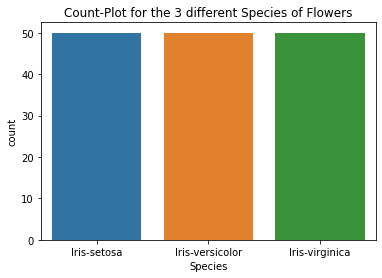

In [7]:
# Representing the Frequncy Plot for the Species Column

plt.title('Count-Plot for the 3 different Species of Flowers')
sns.countplot(x=df['Species'])

<AxesSubplot:title={'center':'Count-Plot for the 3 different Species of Flowers'}, xlabel='Species', ylabel='count'>

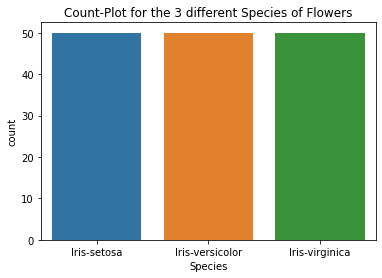

In [8]:
# Representing the Frequncy Plot for the Species Column

plt.title('Count-Plot for the 3 different Species of Flowers')
sns.countplot(x=df['Species'])

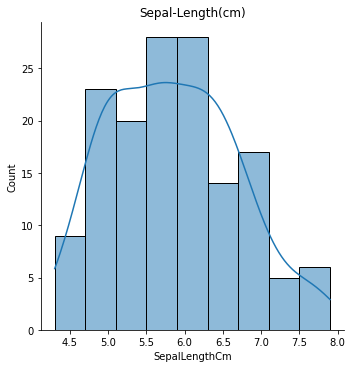

In [9]:
sns.displot(x=df['SepalLengthCm'],kde=True).set(title = 'Sepal-Length(cm)')

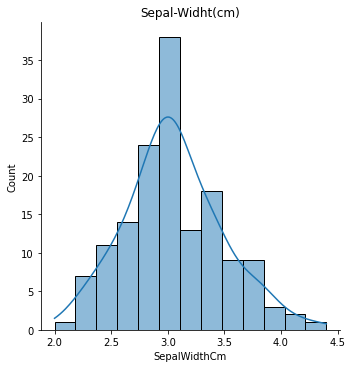

In [10]:
sns.displot(x=df['SepalWidthCm'],kde=True).set(title = 'Sepal-Widht(cm)')

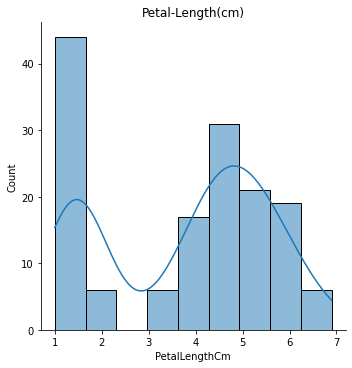

In [11]:
sns.displot(x=df['PetalLengthCm'], kde=True).set(title = 'Petal-Length(cm)')

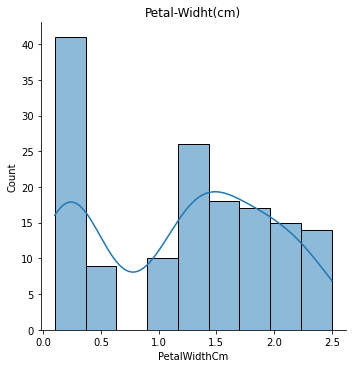

In [12]:
sns.displot(x=df['PetalWidthCm'], kde=True).set(title = 'Petal-Widht(cm)')

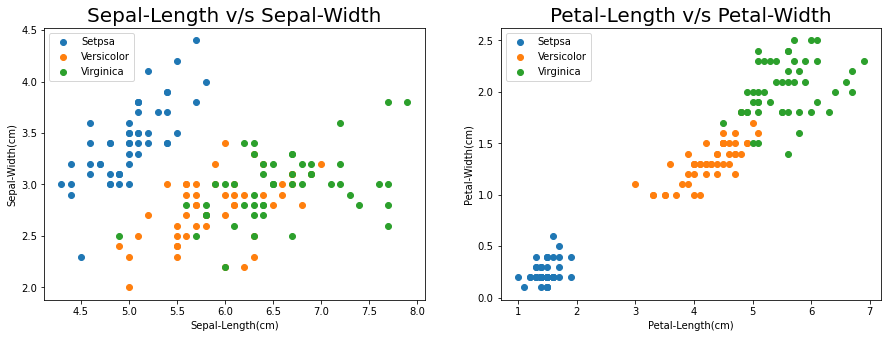

In [13]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Sepal-Length v/s Sepal-Width',fontsize=20)

plt.scatter('SepalLengthCm', 'SepalWidthCm', data = df[df['Species']=='Iris-setosa'], label='Setpsa')
plt.scatter('SepalLengthCm', 'SepalWidthCm', data = df[df['Species']=='Iris-versicolor'], label='Versicolor')
plt.scatter('SepalLengthCm', 'SepalWidthCm', data = df[df['Species']=='Iris-virginica'], label='Virginica')

plt.xlabel('Sepal-Length(cm)')
plt.ylabel('Sepal-Width(cm)')
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.title('Petal-Length v/s Petal-Width',fontsize=20)

plt.scatter('PetalLengthCm', 'PetalWidthCm', data = df[df['Species']=='Iris-setosa'], label='Setpsa')
plt.scatter('PetalLengthCm', 'PetalWidthCm', data = df[df['Species']=='Iris-versicolor'], label='Versicolor')
plt.scatter('PetalLengthCm', 'PetalWidthCm', data = df[df['Species']=='Iris-virginica'], label='Virginica')

plt.xlabel('Petal-Length(cm)')
plt.ylabel('Petal-Width(cm)')
plt.legend(loc=2)

In [14]:
le = LabelEncoder()
df['Encoded_Species']= le.fit_transform(df['Species'])

print(df['Encoded_Species'].value_counts())

df

0    50
1    50
2    50
Name: Encoded_Species, dtype: int64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [15]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Encoded_Species']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [16]:
dTree = DecisionTreeClassifier()

# Training the Decision Tree Model
dTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Predicting the values using the X_test data set

predicted_Value = dTree.predict(X_test)
print(predicted_Value)


[2 2 2 2 2 1 0 0 0 0 0 1 1 0 2 2 0 1 1 1 1 2 2 0 2 1 1 0 0 0]


In [18]:
# Checking the accuracy at the initial stage

dTree.score(X_test, y_test)

1.0

<AxesSubplot:title={'center':'Confusion Matrix'}>

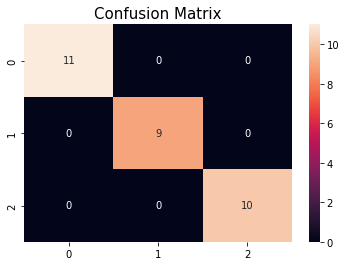

In [19]:
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')

sns.heatmap(confusion_matrix(y_test, predicted_Value), annot=True)

[Text(0.3076923076923077, 0.9285714285714286, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [39, 41, 40]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'PetalLengthCm <= 4.75\ngini = 0.5\nsamples = 81\nvalue = [0, 41, 40]\nclass = Versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'PetalWidthCm <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'PetalWidthCm <= 1.75\ngini = 0.201\nsamples = 44\nvalue = [0, 5, 39]\nclass = Virginica'),
 Text(0.38461538461538464, 0.5, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Versicolor'),
 Text(

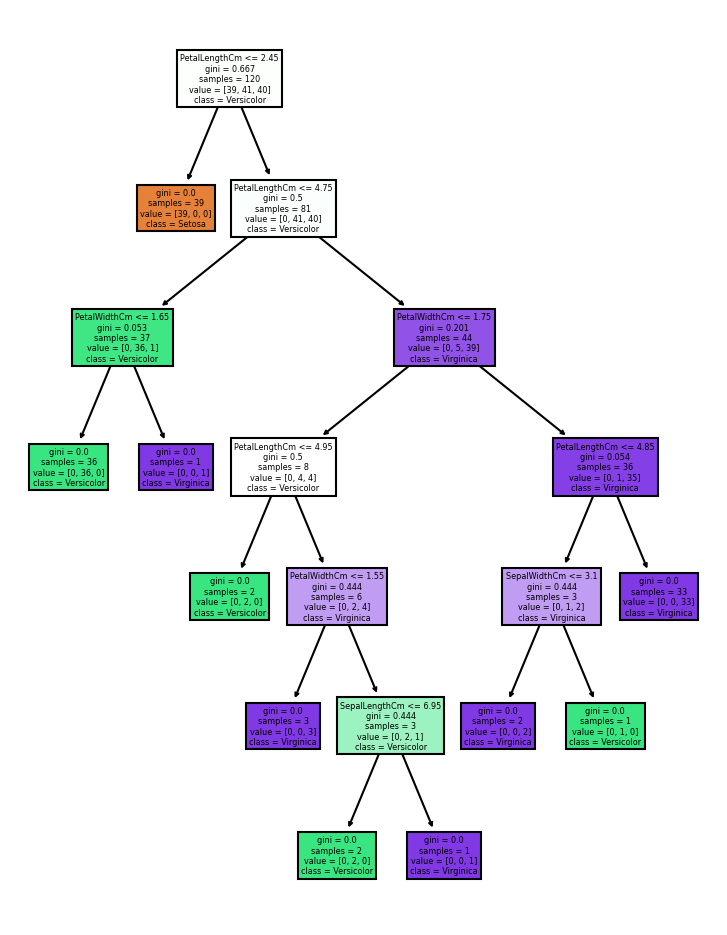

In [20]:
plt.figure(figsize=(6,8), dpi=150)
plot_tree(dTree, filled=True, feature_names=x.columns, class_names=['Setosa', 'Versicolor', 'Virginica'])

In [21]:
# max_depth, min_samples_split and max_leaf_nodes are taken as the parameters for performing the GridSearchCV

params = {'max_depth' : list(range(1,6)), 'min_samples_split' : list(range(1,6)), 'max_leaf_nodes' : list(range(1,6))}

grid_search_cv = GridSearchCV(dTree, params, verbose=1)

grid_search_cv.fit(X_train, y_train)# Best Score obtained from this GridSearchCV 

grid_search_cv.best_score_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


/Users/subhraneel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/subhraneel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/subhraneel/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/subhraneel/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             verbose=1)

In [22]:
# Getting the best-suited parameters for the current dataset to get maximum accuracy

grid_search_cv.best_params_

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [23]:
# Best Score obtained from this GridSearchCV 

grid_search_cv.best_score_

0.925

In [24]:
# Training the new Decsion Tree Model with the obtained parameters for better performance

dTree = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_split=2)

dTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [25]:
# Predicting the values using the X_test data set

predicted_Value = dTree.predict(X_test)
print(predicted_Value)

[2 2 2 2 2 1 0 0 0 0 0 2 1 0 2 2 0 1 1 1 1 2 2 0 2 1 1 0 0 0]


In [26]:
# Checking the accuracy after altering the parameters

dTree.score(X_test, y_test)

0.9666666666666667

<AxesSubplot:title={'center':'Confusion Matrix'}>

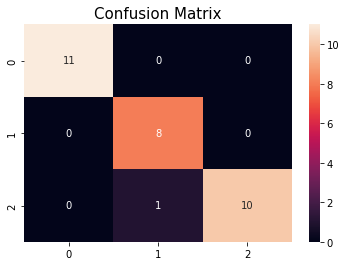

In [27]:
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')

sns.heatmap(confusion_matrix(predicted_Value, y_test), annot=True)

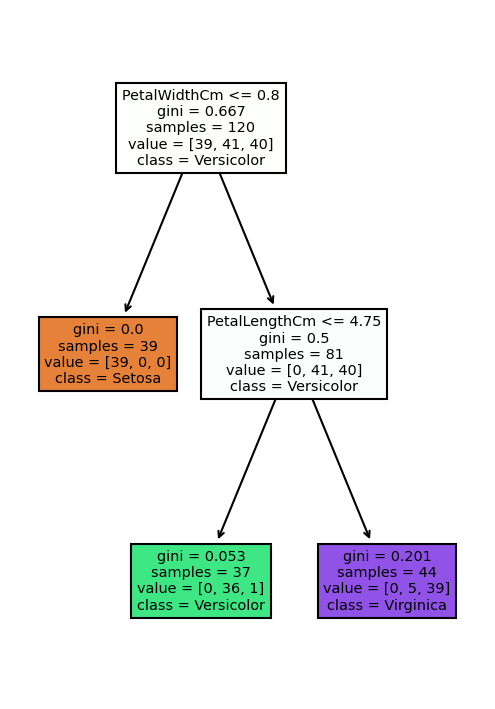

In [28]:
plt.figure(figsize=(4,6), dpi=150)
plot_tree(dTree, filled=True, feature_names=x.columns, class_names=['Setosa', 'Versicolor', 'Virginica']);